In [1]:
import cv2
import keras

Using TensorFlow backend.


In [2]:
from model import *
from matplotlib import pyplot as plt

In [3]:
model = unet()
model.load_weights("./models/Unet.50-0.98.hdf5")

/home/dmitrii/sky_detect/Semantic-Segmentation-Suite/UNET/sky-segmentation/keras_unet/model.py:58: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


In [4]:
image_1 = cv2.imread('./data/sky/iphone500/test/0.jpg', 0)
image_2 = cv2.imread('./data/sky/iphone500/test/1.jpg', 0)
image_3 = cv2.imread('./data/sky/iphone500/test/6.jpg', 0)
image_4 = cv2.imread('./data/sky/iphone500/test/4.jpg', 0)

In [5]:
pred_1 = cv2.imread('0_with_mask.png', 0)
pred_2 = cv2.imread('1_with_mask.png', 0)
pred_3 = cv2.imread('6_with_mask.png', 0)
pred_4 = cv2.imread('4_with_mask.png', 0)

In [6]:
img = [image_1, image_2, image_3, image_4]
pred = [pred_1, pred_2, pred_3, pred_4]

23


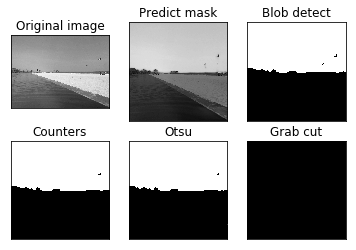

74


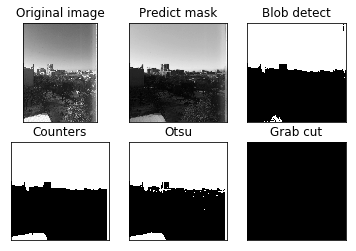

268


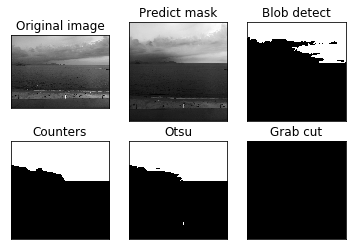

348


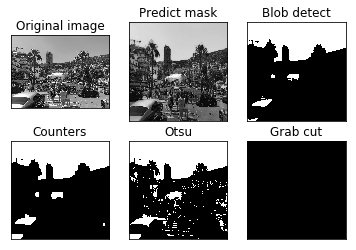

In [7]:
for i in range(4):  
    im = img[i]
    pd = pred[i]

    board_i = 150
    board_p = np.median(pd)
    
#     # Global value threshhold
    ret,thresh1 = cv2.threshold(pd,board_i,255,cv2.THRESH_BINARY)
#     fgbg = cv2.BackgroundSubtractorMOG()
#     thresh1 = fgbg.apply(pd)
    
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(pd,(5,5),0)
    ret3,thresh3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        # Morphological
    kernel = np.ones((25,25),np.uint8)
    tmp = thresh3.copy()
#     tmp = cv2.bitwise_not(tmp)
    thresh2 = cv2.morphologyEx(tmp, cv2.MORPH_OPEN, kernel)
#     thresh2 = cv2.bitwise_not(thresh2)
    
    # Grab cut
    rect = (1, 1, thresh2.shape[0], thresh2.shape[1])
    mask = np.zeros(thresh2.shape[:2],np.uint8)
    
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    cv2.grabCut(cv2.cvtColor(thresh2, cv2.COLOR_GRAY2RGB),mask,rect,bgdModel,fgdModel,15,cv2.GC_INIT_WITH_RECT)
    
    mask2 = np.where((mask==2)|(mask==0),1,0).astype('uint8')
    thresh4 = thresh1*mask2[:,:]
    
    params = cv2.SimpleBlobDetector_Params()

    # Change thresholds
    params.minThreshold = 0
    params.maxThreshold = 254


    # Filter by Area.
    params.filterByArea = True
    params.minArea = 10000

    # Filter by Circularity
    params.filterByCircularity = False
    params.minCircularity = 0.1

    # Filter by Convexity
    params.filterByConvexity = False
    params.minConvexity = 0.87

    # Filter by Inertia
    params.filterByInertia = False
    params.minInertiaRatio = 0.01

    ver = (cv2.__version__).split('.')
    if int(ver[0]) < 3 :
        detector = cv2.SimpleBlobDetector(params)
    else : 
        detector = cv2.SimpleBlobDetector_create(params)
    # Detect blobs.
    keypoints = detector.detect(thresh4)

    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
    # the size of the circle corresponds to the size of blob

    thresh1 = cv2.drawKeypoints(thresh4, keypoints, thresh1, (0,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    im2, contours, hierarchy = cv2.findContours(thresh4.astype('uint8'), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(thresh4, contours, -1, (0,0,0), cv2.FILLED)
    print(len(contours))
    titles = ['Original image','Predict mask','Blob detect','Counters','Otsu','Grab cut']
    images = [im, pd, thresh1, thresh2, thresh3, thresh4]

    for i in range(6):
        plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
        plt.title(titles[i])
        plt.xticks([]),plt.yticks([])

    plt.show()

In [16]:
# Standard imports
import cv2
import numpy as np;

# Read image
im = cv2.imread('0_with_mask.png', 0)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200


# Filter by Area.
params.filterByArea = True

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = False
    
# Filter by Inertia
params.filterByInertia = False
# params.minInertiaRatio = 0.01

# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
	detector = cv2.SimpleBlobDetector(params)
else : 
	detector = cv2.SimpleBlobDetector_create(params)


# Detect blobs.
keypoints = detector.detect(im)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures
# the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Show blobs


In [17]:
cv2.imwrite("Keypoints.png", im_with_keypoints)

True